In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from andi_datasets.models_phenom import models_phenom
from andi_datasets.utils_challenge import label_continuous_to_list
from matplotlib import rcParams

from src.datasets import AndiDataset
from src.utils import colors

c:\Users\Manik\miniconda3\envs\masters\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
rcParams["font.size"] = 14
sns.set_style("whitegrid")

In [4]:
dataset_creator = AndiDataset()

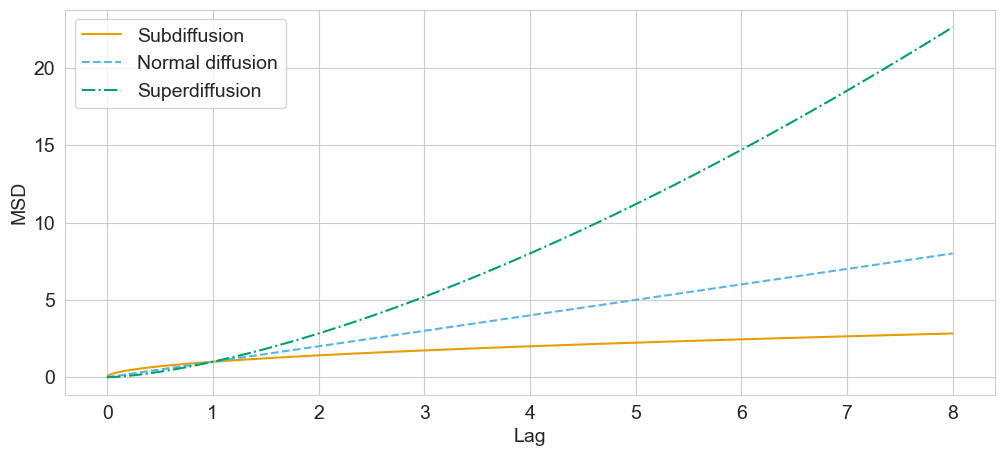

In [6]:
# draw sub, normal and superdiffusion MSD

t = np.linspace(0, 8, 1000)
alphas = [0.5, 1.0, 1.5]
# colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]
labels = ["Subdiffusion", "Normal diffusion", "Superdiffusion"]
linestyles = ["-", "--", "-."]

def msd(t, alpha):
    return t ** alpha

fig, ax = plt.subplots(figsize=(12, 5))

for idx, (alpha, color) in enumerate(zip(alphas, colors[1:])):
    ax.plot(t, msd(t, alpha), label=labels[idx], color=color, linestyle=linestyles[idx])

ax.set_xlabel("Lag")
ax.set_ylabel("MSD")
ax.legend()

plt.savefig("../figures/diff.pdf")

In [77]:
T = 200

single_state = dataset_creator.single_state(5, T, 1.5, 1)[0]
muli_state = dataset_creator.multi_state(5, T, [1.5, 0.6], [[1, 0.5], [2, 0.5]])[0]
confinment = dataset_creator.confinemnet(10, T, [1.5, 0.6], [[1, 0.5], [2, 0.5]])[0]
immobile = dataset_creator.immobile(10, T, 1.5, 1)[0]
dimmerization = dataset_creator.dimmerization(20, T, [1.5, 0.6], [[1, 0.5], [2, 0.5]])[
    0
]

all_data = [single_state, muli_state, confinment, immobile, dimmerization]
labels = ["SSM", "MSM", "TCM", "QTM", "DIM"]

In [78]:
all_lines_styles = ["-", "--", "-.", ":", "-"]

In [79]:
def plot_trajectories(ax, trajs):
    for i in range(trajs.shape[1]):
        ax.plot(
            trajs[:, i, 0],
            trajs[:, i, 1],
            linewidth=1.5,
            linestyle=np.random.choice(all_lines_styles),
            c=np.random.choice(colors),
        )

C:\Windows\Temp\ipykernel_11212\3498350789.py:23: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


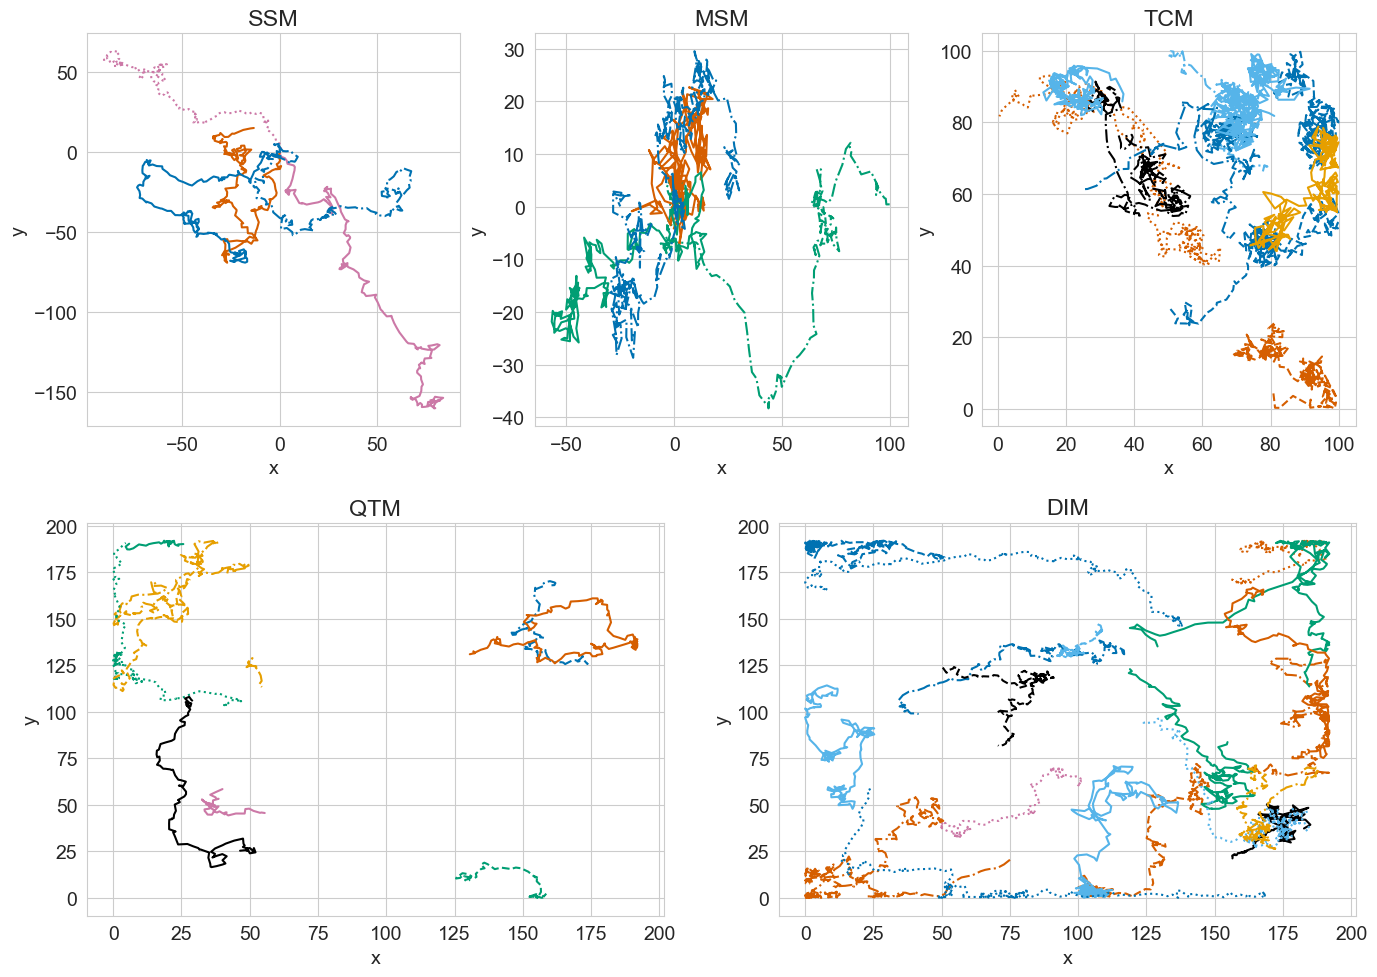

In [82]:
fig = plt.figure(figsize=(14, 10), layout="constrained")

gs0 = fig.add_gridspec(2, 1)

gs1 = gs0[0].subgridspec(1, 3)
gs2 = gs0[1].subgridspec(1, 2, hspace=5.5)


for i in range(3):
    ax = fig.add_subplot(gs1[i])
    plot_trajectories(ax, all_data[i])
    ax.set_title(labels[i])
    ax.set_xlabel("x")
    ax.set_ylabel("y")

for i in range(2):
    ax = fig.add_subplot(gs2[i])
    plot_trajectories(ax, all_data[i + 3])
    ax.set_title(labels[i + 3])
    ax.set_xlabel("x")
    ax.set_ylabel("y")

plt.tight_layout()
plt.savefig("../figures/data_showcase.pdf")
plt.show()

### Change points

In [71]:
ps = [0.01, 0.05, 0.2]


def plot_change_points(ax, traj, labels, p):
    changepoints = label_continuous_to_list(labels[:, 0, :])[0]
    x, y = traj[:, 0, 0], traj[:, 0, 1]
    xs = np.arange(len(x))
    ax.plot(xs, x, label="x", linestyle="--", color=colors[-4])
    ax.plot(xs, y, label="y", linestyle="-", color=colors[2])
    for i in range(len(changepoints)):
        ax.axvline(changepoints[i], c=colors[-2], linestyle="--")
    ax.set_title(
        "Number of Change Points: " + str(len(changepoints)) + " $(p=" + str(p) + ")$"
    )

In [60]:
trajectories_and_labels = [
    models_phenom().multi_state(
        1,
        150,
        M=[[1 - ps[i], ps[i]], [ps[i], 1 - ps[i]]],
        alphas=[[.7, 0.0], [1.5, 0.1]],
    )
    for i in range(3)
]

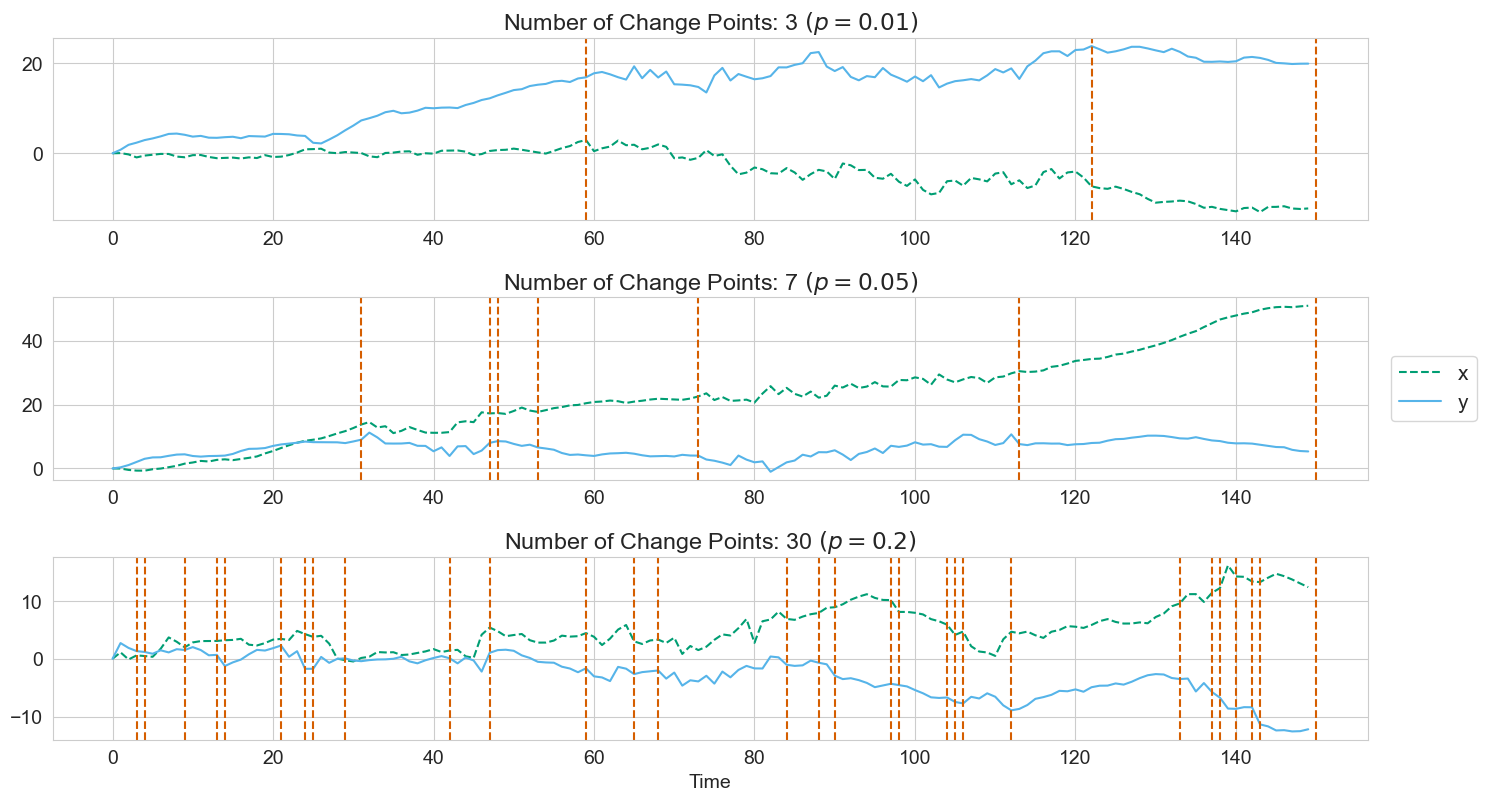

In [72]:
fig, axes = plt.subplots(3, 1, figsize=(14, 8))

for i, (traj, labels) in enumerate(trajectories_and_labels):
    plot_change_points(axes[i], traj, labels, ps[i])

plt.tight_layout()
# get the legend from each plot and combine them
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="right", bbox_to_anchor=(1.07, 0.5), fontsize=15)
axes.flatten()[-1].set_xlabel("Time")
plt.savefig("../figures/change_points.pdf", bbox_inches='tight')
plt.show()